In [5]:
import pandas as pd                    #first we imported all imp libraries
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [6]:
df = pd.read_csv("titanic.csv")          #here is fell of data  
df.head(5)                               #here we saw first five columns of data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.sample(10)          #here we saw first random 10 columns of data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S


In [8]:
df.info()         #info means it show all data types of columns present in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# df = df.Cabin
# df.sample(10)

In [6]:
corr = df.corr() 

In [7]:
corr          #here we can see that co-relation of columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


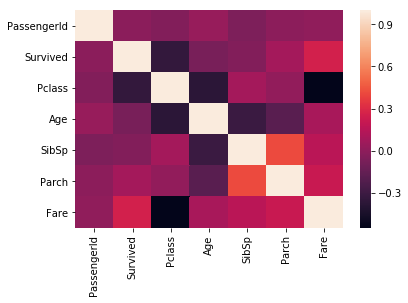

In [8]:
sn.heatmap(corr)            #graphical representations of relations

In [9]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df = df.drop([ "Cabin", "Name", "SibSp",  "Ticket" ],axis = 1,)  #here i drop all the columns which is un usefull for me 
df.info()              #now i saw that all columns are in int format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
df.describe(include='object')      #here i can saw that all uniques items present in data set

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [12]:
df["Age"]= df["Age"].fillna(df["Age"].mean())        #here i do mean of age column coz in age column evryone`s age is not 
                                                    #mention so i use mean of all age.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
df = pd.get_dummies(df)         #here we do dummies of all uniques columns
df

,PassengerId,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,8.0500,0,1,0,0,1
5,6,0,3,29.699118,0,8.4583,0,1,0,1,0
6,7,0,1,54.000000,0,51.8625,0,1,0,0,1
7,8,0,3,2.000000,1,21.0750,0,1,0,0,1
8,9,1,3,27.000000,2,11.1333,1,0,0,0,1
9,10,1,2,14.000000,0,30.0708,1,0,1,0,0


In [15]:
x = df.drop("Survived", axis = 1)    
y = df["Survived"]

In [2]:
x_train , x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state=11)    #here i split the data for
                                                                                                 # train and test

NameError: name 'train_test_split' is not defined

In [17]:
model = RandomForestClassifier()     #here i  create the model Random forest classifier and  fit the data and gain accuracy 
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8100558659217877

In [18]:
model =  XGBClassifier(random_state=11)   #here i create the model XGBClassifier and  fit the data
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8547486033519553

In [19]:
yp = model.predict(x_test)
print("non left" , sum(yp!=0))       #here i create the confusion matrix
print("left" , sum(yp==0))
cm = confusion_matrix(y_test, yp)
cm

non left 51
left 128


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[110,   8],
       [ 18,  43]], dtype=int64)

# Hyperparameter turning


In [20]:
model = XGBClassifier()                                        # here i do hyperparameter turning
random_grid = {'eta': [x for x in np.linspace(start=0.01, stop=0.2, num = 4)],
               'max_depth':range(1,10,1),
               'min_child_weight':range(1,13,2),
               'gamma':[i/10.0 for i in range(0,5)],
             'subsample':[i/100.0 for i in range(60,100, 5)],
             'colsample_bytree':[i/100.0 for i in range(60,100, 5)],
              'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
              }
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.8188202247191011


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


{'subsample': 0.85,
 'reg_alpha': 0.01,
 'min_child_weight': 1,
 'max_depth': 7,
 'gamma': 0.0,
 'eta': 0.2,
 'colsample_bytree': 0.85}

In [21]:
model = XGBClassifier()             
random_grid = { 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]  
               
              }
# rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 4)
rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.797752808988764


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

{'reg_alpha': 0.001}

In [22]:
model = XGBClassifier(eta = 0, 
                      maxdepth = 5,
                      min_child_weight =11,
                      gamma = 0.0,
                      subsample = 0.7,
                      colsample_bytree = 0.6,
                      reg_alpha= 0.001,
                     )
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8659217877094972

In [23]:
 model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, eta=0, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=3, maxdepth=5,
       min_child_weight=11, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)

In [24]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,        
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
x_train , x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state=11)
model.fit(x_train, y_train)
model.score(x_test, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8547486033519553

In [25]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
x_train , x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state=15)
model.fit(x_train, y_train)
model.score(x_test, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.8212290502793296

In [26]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
model = RandomForestClassifier()                #hyparametr turning for RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start=1, stop=200, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 50, num = 15)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10, 12, 13, 15,17, 20]
min_samples_leaf = [1, 2, 4, 6,8,9, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 4)
# # rf_random = GridSearchCV(model, random_grid, cv=4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8132022471910112


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': False}

In [28]:
model = RandomForestClassifier()      
random_grid = {  'bootstrap':bootstrap}
# rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 4)
rf_random = GridSearchCV(model, random_grid, cv=4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_


0.800561797752809


{'bootstrap': True}

In [31]:
model = RandomForestClassifier(random_state = 11,
                        n_estimators= 63,
                        max_depth=29,
                        min_samples_split=10,
                        min_samples_leaf= 4,
                        max_features = 'auto',
                        bootstrap = False,
    
                             )
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.8603351955307262